In [2]:
# !pip install seaborn matplotlib -q

In [3]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

#Encoder

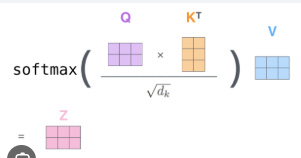

In [4]:
#parameters
# My name is shubham
max_tokens = 4
dims= 8 #dimension of the vector

In [5]:
#Query, key, value
#Query: What we are looking for
#Key: What we are looking at
#Value: What we want to return

#dims of Q,k,v are same: (seq_len (max_tokens), dims)
Q_v= np.random.rand(max_tokens, dims)
K_v = np.random.rand(max_tokens, dims)
V_v = np.random.rand(max_tokens, dims)

print("Print the shape of matrices " , Q_v.shape, K_v.shape, V_v.shape)
print("\n Query matrix:\n \n", Q_v)

Print the shape of matrices  (4, 8) (4, 8) (4, 8)

 Query matrix:
 
 [[0.59249258 0.50092027 0.47519743 0.10999676 0.69581515 0.40943399
  0.5019196  0.9894203 ]
 [0.60962087 0.35293226 0.56319787 0.71128133 0.75543876 0.47045083
  0.04317073 0.65987241]
 [0.76089453 0.98411781 0.99348468 0.02486539 0.37567421 0.29351342
  0.22906532 0.00452663]
 [0.6690167  0.75292664 0.29414091 0.04372324 0.58102841 0.48318247
  0.32893568 0.7388504 ]]


In [6]:
#softmax functions
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=1)).T

In [7]:
z= np.matmul(Q_v, K_v.T) / math.sqrt(dims)
print("\n Dot product of Q and K: \n", z)

softmax_z=  softmax(z)
print("\n Softmax of dot product: \n", softmax_z)
softmax_z[0].sum(), softmax_z.shape


 Dot product of Q and K: 
 [[0.78047084 0.82261078 0.75572548 0.55589828]
 [0.67607667 0.82682914 0.61333253 0.53844573]
 [0.69164369 0.63318211 0.66036899 0.43006909]
 [0.75990299 0.78064434 0.75637455 0.53228216]]

 Softmax of dot product: 
 [[0.26195454 0.27322917 0.25555192 0.20926437]
 [0.25167915 0.29262957 0.23637297 0.21931831]
 [0.27157219 0.25615082 0.26321029 0.20906671]
 [0.26220142 0.26769662 0.26127789 0.20882407]]


(0.9999999999999999, (4, 4))

<Axes: >

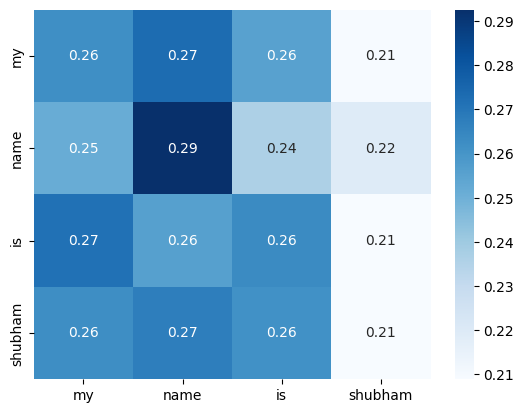

In [8]:
## Visualize the attention scores (Rn it's random)
sns.heatmap(softmax_z, annot=True, fmt=".2f",
xticklabels="my name is shubham".split(), 
yticklabels="my name is shubham".split(),
cmap='Blues')

In [9]:
final_attention_scores = np.matmul(softmax_z, V_v) #multiply softmax value with value matrix
final_attention_scores, final_attention_scores.shape

(array([[0.70494997, 0.66711139, 0.43738444, 0.38650643, 0.44724663,
         0.43331607, 0.58360314, 0.5589688 ],
        [0.69672336, 0.66136942, 0.43594795, 0.39203856, 0.42719443,
         0.4555624 , 0.58005751, 0.55778627],
        [0.70665882, 0.6695521 , 0.44377704, 0.38364737, 0.46006196,
         0.42131592, 0.58614824, 0.56280467],
        [0.70639047, 0.66861376, 0.43826733, 0.38532233, 0.4506637 ,
         0.42936086, 0.58602764, 0.56057247]]),
 (4, 8))

# Where as in decoder we perform masking (Masking in the decoder ensures tokens only attend to previous tokens, preserving the autoregressive property during training)

# Masking:
    - This is to ensure word dont get context from words generated in future
    - Not required in encoders, but required in decoders

In [10]:
mask = np.tril(np.ones((max_tokens, max_tokens)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [11]:
mask[mask == 0] = -np.inf
mask[mask == 1] = 0

In [12]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [13]:
### Decoder process we add mask before applying softmax
attention = softmax(z + mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.4623831 , 0.5376169 , 0.        , 0.        ],
       [0.34335663, 0.32385894, 0.33278443, 0.        ],
       [0.26220142, 0.26769662, 0.26127789, 0.20882407]])

In [14]:
#Decoder
new_v= np.matmul(attention, V_v)
new_v

array([[0.72822142, 0.64271115, 0.62036478, 0.32870145, 0.96608361,
        0.00562308, 0.30697739, 0.4523286 ],
       [0.73168823, 0.61705982, 0.33588736, 0.40320365, 0.48825452,
        0.3995281 , 0.3571111 , 0.36934993],
       [0.8059399 , 0.69723907, 0.33607335, 0.35363358, 0.5676829 ,
        0.27357092, 0.52147537, 0.45881082],
       [0.70639047, 0.66861376, 0.43826733, 0.38532233, 0.4506637 ,
        0.42936086, 0.58602764, 0.56057247]])

In [15]:
#Encoder
final_attention_scores

array([[0.70494997, 0.66711139, 0.43738444, 0.38650643, 0.44724663,
        0.43331607, 0.58360314, 0.5589688 ],
       [0.69672336, 0.66136942, 0.43594795, 0.39203856, 0.42719443,
        0.4555624 , 0.58005751, 0.55778627],
       [0.70665882, 0.6695521 , 0.44377704, 0.38364737, 0.46006196,
        0.42131592, 0.58614824, 0.56280467],
       [0.70639047, 0.66861376, 0.43826733, 0.38532233, 0.4506637 ,
        0.42936086, 0.58602764, 0.56057247]])

# Functions

In [16]:
#softmax functions
def softmax(x):
    return (np.exp(x).T / np.sum(np.exp(x), axis=1)).T

In [17]:
def scaled_attention(q,k,v, mask=False):
    d_k = k.shape[-1]
    z= np.matmul(q, k.T) / math.sqrt(d_k)
    mask_= np.tril(np.ones((max_tokens, max_tokens)))
    mask_[mask_ == 0] = -np.inf
    mask_[mask_ == 1] = 0
    if mask:
        z+= mask_
    attention = softmax(z)
    out= np.matmul(attention, v)
    print("Attention shape: ", attention.shape)
    print("Output shape: ", out.shape)
    return attention, out

In [18]:
scaled_attention(Q_v, K_v, V_v, False)

Attention shape:  (4, 4)
Output shape:  (4, 8)


(array([[0.26195454, 0.27322917, 0.25555192, 0.20926437],
        [0.25167915, 0.29262957, 0.23637297, 0.21931831],
        [0.27157219, 0.25615082, 0.26321029, 0.20906671],
        [0.26220142, 0.26769662, 0.26127789, 0.20882407]]),
 array([[0.70494997, 0.66711139, 0.43738444, 0.38650643, 0.44724663,
         0.43331607, 0.58360314, 0.5589688 ],
        [0.69672336, 0.66136942, 0.43594795, 0.39203856, 0.42719443,
         0.4555624 , 0.58005751, 0.55778627],
        [0.70665882, 0.6695521 , 0.44377704, 0.38364737, 0.46006196,
         0.42131592, 0.58614824, 0.56280467],
        [0.70639047, 0.66861376, 0.43826733, 0.38532233, 0.4506637 ,
         0.42936086, 0.58602764, 0.56057247]]))

In [19]:
scaled_attention(Q_v, K_v, V_v, True)

Attention shape:  (4, 4)
Output shape:  (4, 8)


(array([[1.        , 0.        , 0.        , 0.        ],
        [0.4623831 , 0.5376169 , 0.        , 0.        ],
        [0.34335663, 0.32385894, 0.33278443, 0.        ],
        [0.26220142, 0.26769662, 0.26127789, 0.20882407]]),
 array([[0.72822142, 0.64271115, 0.62036478, 0.32870145, 0.96608361,
         0.00562308, 0.30697739, 0.4523286 ],
        [0.73168823, 0.61705982, 0.33588736, 0.40320365, 0.48825452,
         0.3995281 , 0.3571111 , 0.36934993],
        [0.8059399 , 0.69723907, 0.33607335, 0.35363358, 0.5676829 ,
         0.27357092, 0.52147537, 0.45881082],
        [0.70639047, 0.66861376, 0.43826733, 0.38532233, 0.4506637 ,
         0.42936086, 0.58602764, 0.56057247]]))

# **Multihead Attentions**

In [20]:
import torch 
import torch.nn as nn
import numpy as np

In [32]:
#parameters
sentence= """My Name is Shubham"""
max_seq_len = 4
d_model = 512
num_heads=8
batch_size= 1

#created vector embeddig for each token, having shape 512
x= torch.randn(batch_size, max_seq_len, d_model)
x, x.shape # (batch_size, max_seq_len, d_model)

(tensor([[[ 0.2547,  1.3367, -0.0992,  ...,  0.7566, -1.2766,  2.6188],
          [-0.5319, -0.6167,  1.8219,  ..., -0.2007,  1.3755,  1.3908],
          [-2.3108,  1.8168,  0.6984,  ...,  1.0506, -0.7242,  0.4962],
          [ 0.8165, -0.2280, -1.8268,  ...,  0.7876, -0.8737,  0.7585]]]),
 torch.Size([1, 4, 512]))

In [103]:
nn.Linear(d_model, d_model)

## as we're doing this in one shot for all heads
qkv_layer = nn.Linear(d_model, 3*d_model)
qkv = qkv_layer(x)
qkv, qkv.shape

(tensor([[[ 0.8584,  0.5282, -0.8163,  ...,  0.8563, -0.4730,  0.3908],
          [-1.0934, -0.7138, -1.3240,  ..., -0.1326, -1.0827,  0.3269],
          [ 0.9912,  0.1033, -0.3759,  ..., -0.4463, -1.0191, -0.2219],
          [-0.0231,  0.8548,  0.1783,  ...,  0.0436, -0.6004, -0.6372]]],
        grad_fn=<ViewBackward0>),
 torch.Size([1, 4, 1536]))

In [104]:
#first token
qkv[0][0], qkv[0][0].shape

(tensor([ 0.8584,  0.5282, -0.8163,  ...,  0.8563, -0.4730,  0.3908],
        grad_fn=<SelectBackward0>),
 torch.Size([1536]))

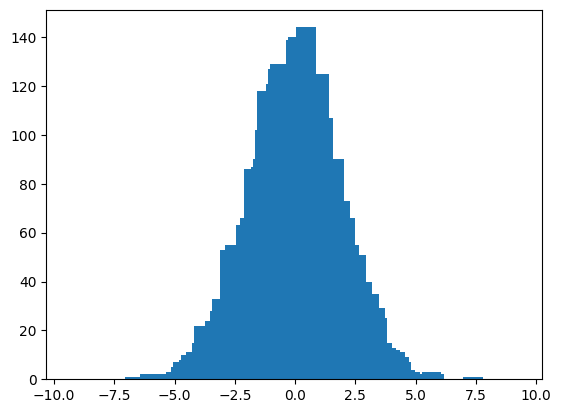

In [105]:
y_val = torch.histc(qkv, bins=200, max=3, min=-3)
x_val= np.arange(-3, 3, 0.03)*3
plt.bar(x_val, y_val, align="center")
plt.show("QKV Distribution")

In [106]:
## Heads
num_heads=8
d_model = 512 

head_dim= d_model // num_heads
head_dim

64

In [107]:
qkv.shape

torch.Size([1, 4, 1536])

In [108]:
qkv = qkv.reshape(batch_size, max_seq_len, num_heads, head_dim*3)
qkv.shape

torch.Size([1, 4, 8, 192])

In [109]:
qkv= qkv.permute(0, 2, 1, 3) # batchsize, num_heads, max_seq_len, head_dim*3
qkv.shape  # (4, 192) metrices are across each head

torch.Size([1, 8, 4, 192])

In [110]:
#shape across each head
for i in range(num_heads):
    print( f"{i+1}st head dim -- {qkv[0][i].shape}")


1st head dim -- torch.Size([4, 192])
2st head dim -- torch.Size([4, 192])
3st head dim -- torch.Size([4, 192])
4st head dim -- torch.Size([4, 192])
5st head dim -- torch.Size([4, 192])
6st head dim -- torch.Size([4, 192])
7st head dim -- torch.Size([4, 192])
8st head dim -- torch.Size([4, 192])


In [111]:
192/3

64.0

In [124]:
q,k,v = qkv.chunk(3, dim=-1)
q.shape #(batch_size, num_heads, max_seq_len, head_dim) # across each head now there will be three matrices q,k,v with shape of [1, 8, 4, 64]

torch.Size([1, 8, 4, 64])

In [153]:
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

In [152]:
#validation of split
# qkv[0][0][0][0:64] == q[0][0][0]


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

In [143]:
# 64+64

128

In [151]:
# qkv[0][0][0][64:128] ==  k[0][0][0]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

In [131]:
# k.shape

torch.Size([1, 8, 4, 64])

In [158]:
k.shape, k.size()[-1]

(torch.Size([1, 8, 4, 64]), 64)

In [161]:
q.shape, k.shape, k.transpose(-2,-1).shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 64, 4]))

In [162]:
d_k = k.size()[0] #64
scaled= torch.matmul(q, k.transpose(-2,-1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [166]:
def softmax(x):
    # Compute the exponentials
    exp_x = torch.exp(x)
    
    # Sum of exponentials along the specified dimension (usually the last dimension)
    sum_exp_x = exp_x.sum(dim=-1, keepdim=True)
    
    # Normalize by dividing the exponentials by the sum
    return exp_x / sum_exp_x

In [168]:
attention_proba = softmax(scaled)
attention_proba.shape

torch.Size([1, 8, 4, 4])

In [175]:
attention_proba[0][0][0]

tensor([0.8884, 0.0589, 0.0207, 0.0320], grad_fn=<SelectBackward0>)

In [174]:
attention_proba[0][0][0].sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [180]:
v.shape, attention_proba.shape

(torch.Size([1, 8, 4, 64]), torch.Size([1, 8, 4, 4]))

In [185]:
#Multiply with value metrices with attention probability
attention_scores= torch.matmul(attention_proba, v)
attention_scores, attention_scores.shape


(tensor([[[[-0.0160, -0.8836,  0.6009,  ...,  0.4748,  0.1933,  0.4794],
           [ 0.0766,  0.4771,  0.1050,  ..., -0.5758,  0.2026, -0.7237],
           [-0.1605,  0.8618,  0.1932,  ..., -0.2286,  0.1347, -0.4685],
           [-0.1660,  0.9519,  0.4184,  ...,  0.0449,  0.1201, -0.1099]],
 
          [[ 0.1382, -0.2515, -1.3329,  ...,  0.2701, -0.6163, -0.2980],
           [-0.7632, -0.0828,  0.5247,  ...,  0.2260, -1.2765, -0.4882],
           [ 0.1391, -0.2459, -1.2835,  ...,  0.2878, -0.6033, -0.3059],
           [ 0.2400,  0.0712, -0.3061,  ...,  0.3195, -0.3117, -0.2629]],
 
          [[-0.2999,  0.0379,  0.3289,  ..., -0.1532,  0.4390,  0.1433],
           [ 0.0582,  0.3934,  0.4589,  ...,  0.0540,  0.0570,  0.3729],
           [-0.1046,  0.5873,  0.7885,  ...,  0.0113,  0.0129,  0.1058],
           [-0.0398,  0.7209,  0.8844,  ...,  0.0439, -0.0964,  0.1093]],
 
          ...,
 
          [[-0.0728,  0.7730, -0.2296,  ..., -0.4736, -0.1730,  0.3964],
           [-0.1782, -0.0

In [186]:
attention_scores

tensor([[[[-0.0160, -0.8836,  0.6009,  ...,  0.4748,  0.1933,  0.4794],
          [ 0.0766,  0.4771,  0.1050,  ..., -0.5758,  0.2026, -0.7237],
          [-0.1605,  0.8618,  0.1932,  ..., -0.2286,  0.1347, -0.4685],
          [-0.1660,  0.9519,  0.4184,  ...,  0.0449,  0.1201, -0.1099]],

         [[ 0.1382, -0.2515, -1.3329,  ...,  0.2701, -0.6163, -0.2980],
          [-0.7632, -0.0828,  0.5247,  ...,  0.2260, -1.2765, -0.4882],
          [ 0.1391, -0.2459, -1.2835,  ...,  0.2878, -0.6033, -0.3059],
          [ 0.2400,  0.0712, -0.3061,  ...,  0.3195, -0.3117, -0.2629]],

         [[-0.2999,  0.0379,  0.3289,  ..., -0.1532,  0.4390,  0.1433],
          [ 0.0582,  0.3934,  0.4589,  ...,  0.0540,  0.0570,  0.3729],
          [-0.1046,  0.5873,  0.7885,  ...,  0.0113,  0.0129,  0.1058],
          [-0.0398,  0.7209,  0.8844,  ...,  0.0439, -0.0964,  0.1093]],

         ...,

         [[-0.0728,  0.7730, -0.2296,  ..., -0.4736, -0.1730,  0.3964],
          [-0.1782, -0.0879,  0.4941,  ...,